# INTRO

ID

Refat Ahmed -190021130

>

Ahnaf Abid - 190021135

>

Tahya Ahammed Bisma - 190021213




**Introduction**

Our machine learning initiative centers on fetal health classification, utilizing a carefully assembled dataset from Kaggle.Applying advanced algorithms, including XGBoost, Random Forest, and SVM, our aim is to refine the accuracy of fetal health assessments.We have used in total 8 models here. This project aims to aid prenatal care, offering a reliable and efficient method for classifying fetal well-being.


**Objective**

The objective of the fetal health classifier model project is to develop an accurate and reliable machine learning model using the CTG dataset. Leveraging advanced algorithms, the aim is to classify fetal health based on cardiotocography (CTG) features. The project seeks to provide a  tool for healthcare practitioners, and aid them to diagnose fetal health complications.


**Process Pipeline**

**Data Preprocessing**:
Clean and preprocess the collected data, addressing missing values and outliers. Normalize or standardize features, and perform exploratory data analysis (EDA) to gain insights into the dataset.

**Feature Engineering**:
Implement feature engineering techniques to enhance the model's ability to capture patterns in the fetal health data. Consider domain-specific knowledge to select and create meaningful features.

**Algorithm Selection**:
Choose machine learning algorithms suitable for classification tasks. Consider algorithms such as Random Forests, Support Vector Machines, Logistic regression based on the nature of the fetal health data.

**Model Development**:
Train and develop the selected machine learning model using the preprocessed dataset. Fine-tune hyperparameters to optimize model performance, and utilize cross-validation to assess generalization.

# Library

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

from imblearn.pipeline import Pipeline
from imblearn.metrics import geometric_mean_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

# **Dataframe**


In [ ]:
df = pd.read_csv('/content/CTG.csv')
df

NameError: name 'pd' is not defined

Df Shape



In [ ]:
df.shape

# Data Pre processing

Checking null value


In [ ]:
df.isnull().sum()

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

Num of rows

In [ ]:
total_rows = df.shape[0]
print("Total number of rows:", total_rows)

Total number of rows: 2129


Rows with missing value

In [ ]:
rows_with_missing = df[df.isnull().any(axis=1)]
num_rows_with_missing = rows_with_missing.shape[0]
print("Number of rows with missing values:", num_rows_with_missing)

Number of rows with missing values: 3


Dropping null value and setting df_1 as new dataframe

In [ ]:
df_1 = df.dropna()

Checking null value

In [ ]:
df_1.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

Checking duplicate value

In [ ]:
print(df_1.duplicated().value_counts())

False    2126
dtype: int64


Checking class imbalance

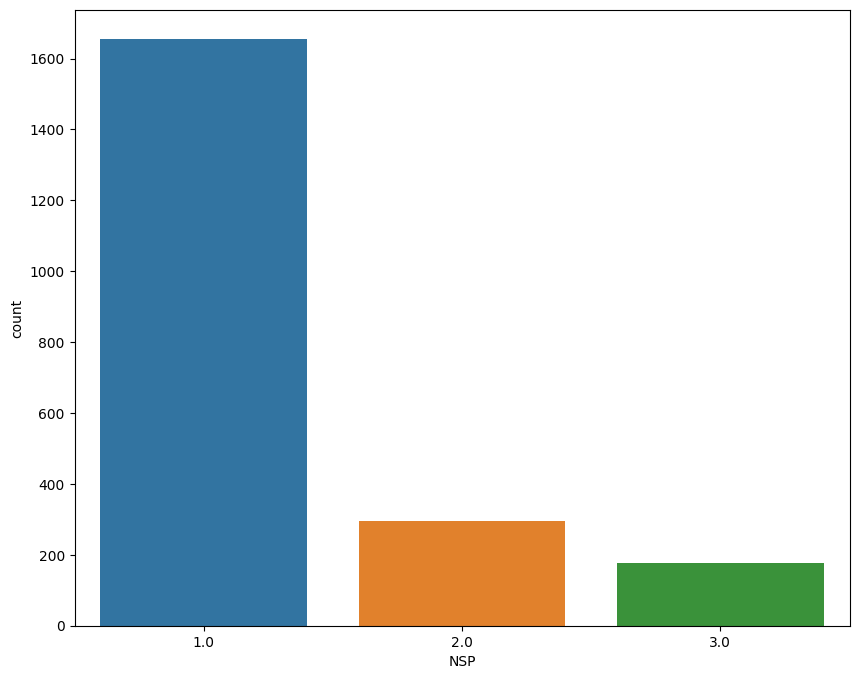

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
df_1['NSP'].value_counts()
sns.countplot(x='NSP', data=df_1)
plt.show()

Printing column names

In [ ]:
column_names = df_1.columns.tolist()

print("Column Names:")
print(column_names)

Column Names:
['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


Excluding irrelevent info

In [ ]:
columns_to_exclude = ['FileName', 'Date', 'SegFile']
df_2 = df_1.drop(columns=columns_to_exclude)

In [ ]:
co= df_2.corr()
co

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
b,1.000000,0.944912,-0.020400,-0.020400,-0.038359,-0.133849,0.225595,-0.126355,0.040505,-0.109861,...,0.021245,-0.071332,-0.027566,0.089531,0.069631,0.087735,-0.125821,-0.167353,-0.080930,-0.110756
e,0.944912,1.000000,-0.013979,-0.013979,0.071572,-0.119249,0.386856,-0.066374,0.044605,-0.104566,...,-0.038732,-0.082700,-0.015549,0.138695,0.043638,0.092371,-0.148302,-0.172476,-0.081097,-0.117499
LBE,-0.020400,-0.013979,1.000000,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,...,-0.062894,0.005591,0.158350,-0.130368,-0.030849,-0.122136,0.069885,0.283783,0.143001,0.148151
LB,-0.020400,-0.013979,1.000000,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,...,-0.062894,0.005591,0.158350,-0.130368,-0.030849,-0.122136,0.069885,0.283783,0.143001,0.148151
AC,-0.038359,0.071572,-0.077967,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,...,-0.113805,0.328854,-0.116153,0.264657,-0.255090,-0.140998,-0.140062,-0.238009,-0.255205,-0.340394
FM,-0.133849,-0.119249,-0.033305,-0.033305,0.053956,1.000000,-0.036626,-0.116461,0.138061,-0.072214,...,-0.022823,0.058019,-0.024547,0.113454,0.001145,0.089162,-0.003765,-0.033851,0.077805,0.060366
UC,0.225595,0.386856,-0.127722,-0.127722,0.212100,-0.036626,1.000000,-0.079651,0.232687,-0.247513,...,-0.097485,-0.029741,-0.026050,0.243954,0.084710,0.113672,-0.205653,-0.251330,-0.073465,-0.163295
ASTV,-0.126355,-0.066374,0.305570,0.305570,-0.197985,-0.116461,-0.079651,1.000000,-0.430705,0.459413,...,-0.142252,-0.113669,0.072269,-0.198840,-0.132195,0.137192,0.308643,0.364282,0.284580,0.471191
MSTV,0.040505,0.044605,-0.279607,-0.279607,0.191378,0.138061,0.232687,-0.430705,1.000000,-0.470259,...,0.021396,0.096120,-0.126216,0.284401,0.259776,0.275303,-0.210904,-0.329125,0.077214,-0.103382
ALTV,-0.109861,-0.104566,0.285630,0.285630,-0.345162,-0.072214,-0.247513,0.459413,-0.470259,1.000000,...,-0.074120,-0.106547,0.075927,-0.205648,-0.117518,-0.123011,0.478205,0.446388,0.303050,0.426146


<Axes: >

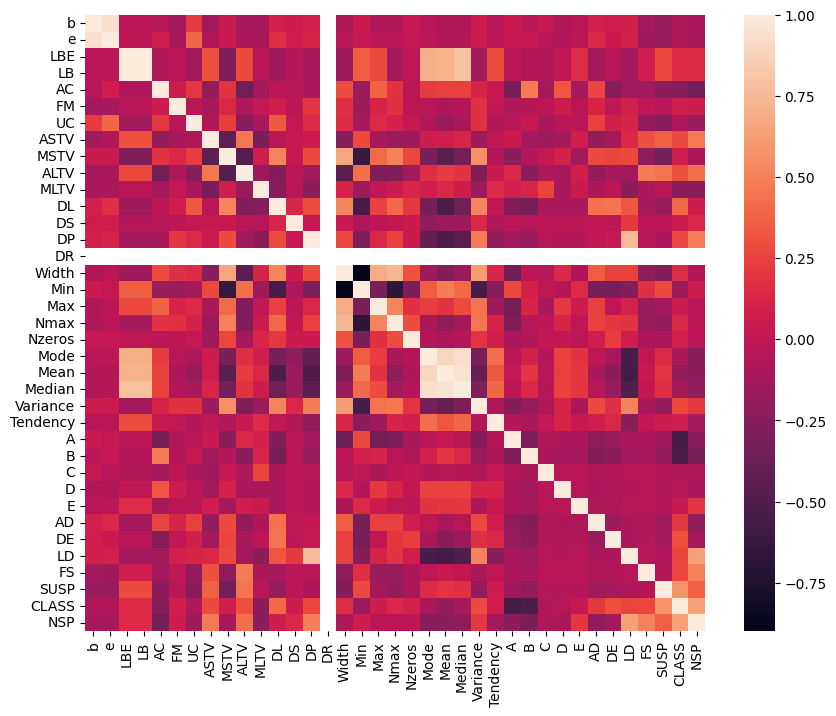

In [ ]:
sns.heatmap(co)

In [ ]:
columns_to_exclude = ['e', 'DR', 'E','CLASS']
df_2 = df_2.drop(columns=columns_to_exclude)

Features

In [ ]:
X = pd.DataFrame(df_2.iloc[:,:-1])

Target Variable

In [ ]:
Y = pd.DataFrame(df_2.iloc[:,-1:])

In [ ]:
Y=Y-1

Checking Class Imbalance Ratio

In [ ]:
Y.value_counts()

NSP
0.0    1655
1.0     295
2.0     176
dtype: int64

In [ ]:
skf = StratifiedKFold(shuffle = True, random_state = 100, n_splits= 10)

# Random Forest Classifier





In [ ]:
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape Y to a 1D array
    Y_train = Y_train.values.ravel()
    Y_test = Y_test.values.ravel()

In [ ]:
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(criterion="gini",n_estimators=150,random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=skf, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', rfecv),
    ('classifier',rfc)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,166.803999,0.019401,0.979167,0.979711,0.979167,0.978471,0.941774
1,168.764709,0.032101,0.979167,0.979236,0.979167,0.979109,0.943300
2,169.997913,0.018624,0.973958,0.974804,0.973958,0.972845,0.926538
3,170.195258,0.020138,0.953125,0.955795,0.953125,0.949125,0.862639
4,186.692700,0.021039,0.973822,0.973581,0.973822,0.973183,0.926312
5,179.979600,0.019446,0.989529,0.989668,0.989529,0.989363,0.971386
6,178.081500,0.021447,0.984293,0.984646,0.984293,0.984415,0.957464
7,169.424987,0.020602,0.979058,0.978999,0.979058,0.978744,0.942274
8,169.230112,0.030180,0.984293,0.984603,0.984293,0.983891,0.955852
9,180.968145,0.024154,0.968586,0.969802,0.968586,0.966848,0.909120


In [ ]:
Output.mean(axis=0)

fit_time                   174.013892
score_time                   0.022713
test_accuracy                0.976500
test_precision_weighted      0.977085
test_recall_weighted         0.976500
test_f1_weighted             0.975599
test_kappa                   0.933666
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

F1-score

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9408190


Classification Report

In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       166
         1.0       0.88      0.72      0.79        29
         2.0       1.00      0.82      0.90        17

    accuracy                           0.94       212
   macro avg       0.94      0.85      0.89       212
weighted avg       0.94      0.94      0.94       212



Confusion Matrix

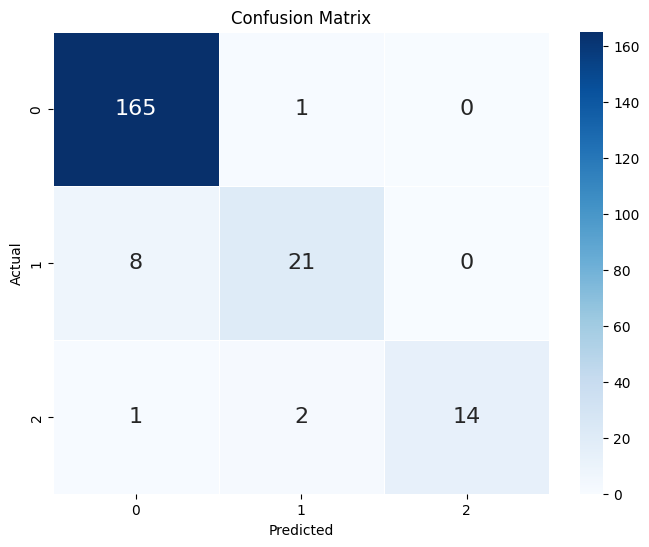

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

G-mean value

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.8400247636418369


ROC-AUC curve

In [ ]:
# Binarize the output
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3

# Using cross_val_predict to obtain predictions with class probabilities
y_score= cross_val_predict(pipeline, X_test,Y_test, cv=skf, method='predict_proba')

# Initialize variables to store ROC curve data
fpr = dict()
tpr = dict()
roc_auc = dict()

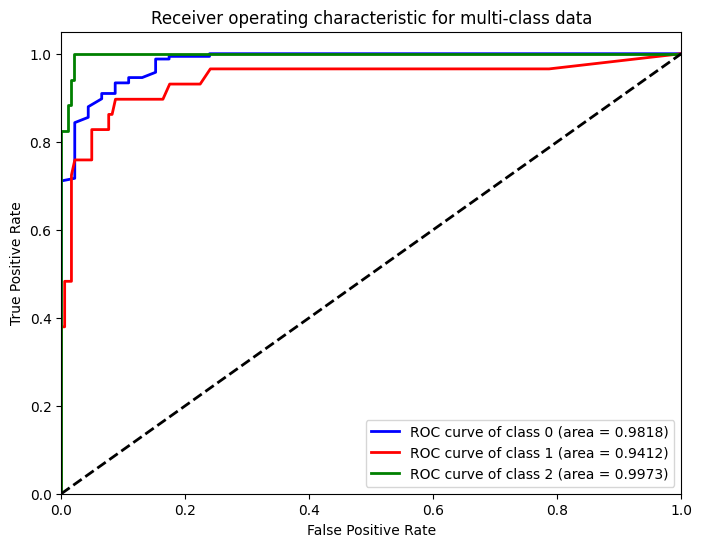

In [ ]:
from itertools import cycle

n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))  # Adjust the label index

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
class_auc_scores = []
for i in range(number_of_classes):
    auc_score = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
    class_auc_scores.append(auc_score)
average_auc = sum(class_auc_scores) / len(class_auc_scores)
print("AUC Scores for Each Class:", class_auc_scores)
print("Average AUC Score:", average_auc)

AUC Scores for Each Class: [0.9817967522262965, 0.9412097230073488, 0.9972850678733032]
Average AUC Score: 0.9734305143689829


Feature Ranking

In [ ]:
rfecv.fit(X_train, Y_train)
best_features = X_train.columns[rfecv.support_]

# print the column names of the selected features
print(best_features)

Index(['AC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Mode', 'Mean',
       'Median', 'A', 'LD', 'FS', 'SUSP'],
      dtype='object')


Feature vs Cross Val Score

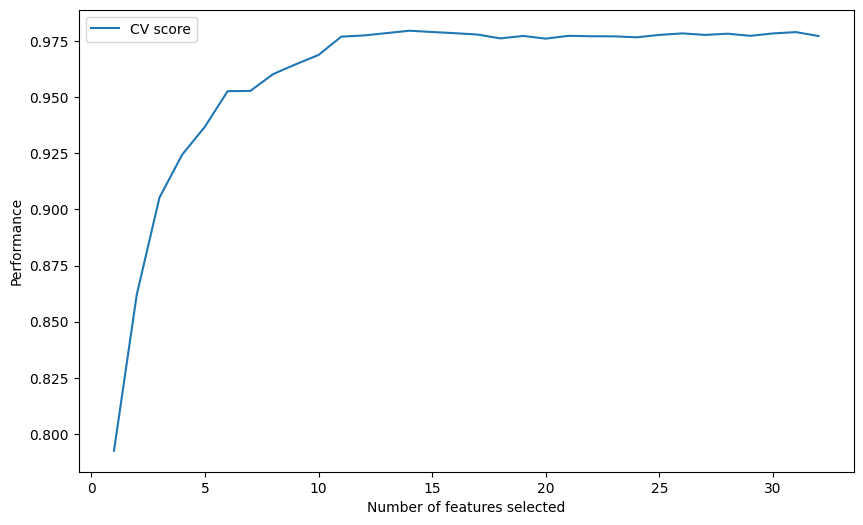

In [ ]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Decision Tree

In [ ]:
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape Y to a 1D array
    Y_train = Y_train.values.ravel()
    Y_test = Y_test.values.ravel()

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',dt)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,0.024151,0.008261,0.979167,0.979167,0.979167,0.979167,0.943851
1,0.026042,0.007232,0.984375,0.984244,0.984375,0.984254,0.957510
2,0.021229,0.007368,0.947917,0.949788,0.947917,0.948671,0.862089
3,0.021173,0.007083,0.942708,0.941166,0.942708,0.939099,0.835309
4,0.021619,0.007108,0.963351,0.962886,0.963351,0.963066,0.898743
5,0.022441,0.007366,0.968586,0.968028,0.968586,0.968088,0.914157
6,0.022121,0.007161,0.963351,0.971125,0.963351,0.965084,0.905905
7,0.021918,0.007026,0.963351,0.966222,0.963351,0.964216,0.903466
8,0.021242,0.012033,0.979058,0.978829,0.979058,0.978709,0.941688
9,0.026851,0.007277,0.968586,0.969940,0.968586,0.969062,0.915698


In [ ]:
Output.mean(axis=0)

fit_time                   0.022879
score_time                 0.007792
test_accuracy              0.966045
test_precision_weighted    0.967140
test_recall_weighted       0.966045
test_f1_weighted           0.965942
test_kappa                 0.907842
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9115406


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       166
         1.0       0.75      0.62      0.68        29
         2.0       0.88      0.82      0.85        17

    accuracy                           0.92       212
   macro avg       0.86      0.81      0.83       212
weighted avg       0.91      0.92      0.91       212



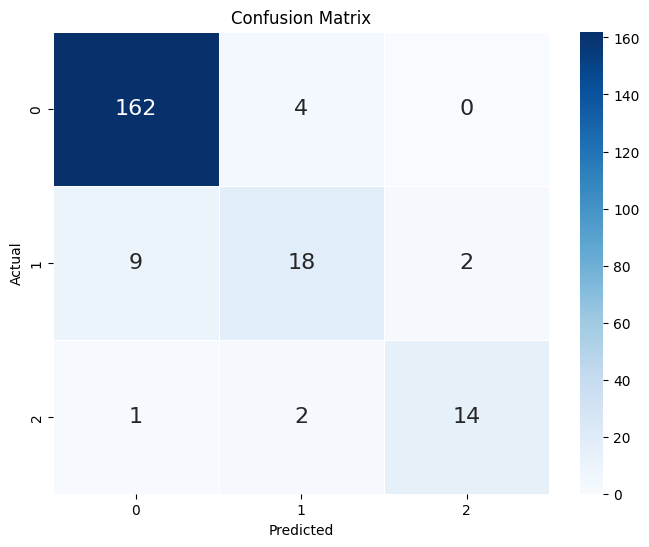

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.7930858158038304


In [ ]:
# Binarize the output
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3
# Use cross_val_predict to obtain predictions with class probabilities
y_score= cross_val_predict(pipeline, X_test,Y_test, cv=skf, method='predict_proba')

# Initialize variables to store ROC curve data
fpr = dict()
tpr = dict()
roc_auc = dict()

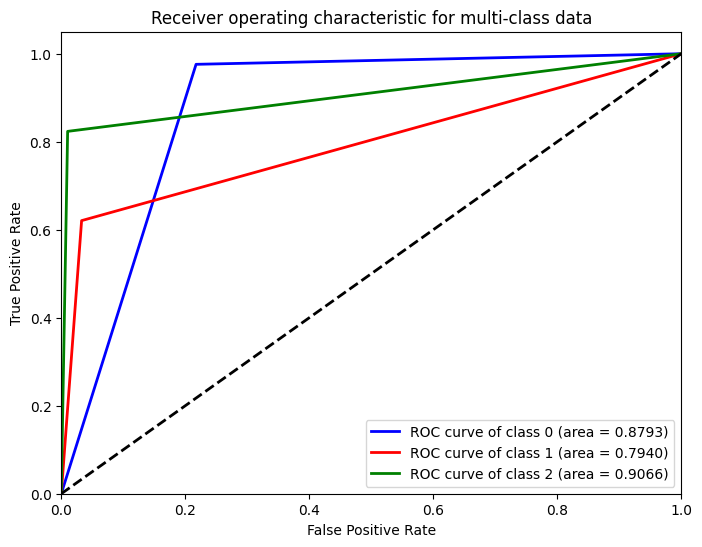

In [ ]:
from itertools import cycle

n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set up colors for the ROC curves
colors = cycle(['blue', 'red', 'green'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i , roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes

In [ ]:
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape Y to a 1D array
    Y_train = Y_train.values.ravel()
    Y_test = Y_test.values.ravel()

In [ ]:
NB = GaussianNB()

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',NB)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,0.004783,0.006539,0.901042,0.930592,0.901042,0.908948,0.767094
1,0.004443,0.005503,0.953125,0.962010,0.953125,0.955319,0.882168
2,0.005113,0.008082,0.937500,0.945816,0.937500,0.940015,0.841573
3,0.003471,0.004707,0.901042,0.922595,0.901042,0.907527,0.759256
4,0.003404,0.004717,0.947644,0.953385,0.947644,0.949346,0.864366
5,0.003415,0.004739,0.963351,0.968567,0.963351,0.964658,0.906693
6,0.004738,0.004767,0.931937,0.950924,0.931937,0.936640,0.832614
7,0.003517,0.004815,0.910995,0.939645,0.910995,0.917811,0.788276
8,0.003510,0.005041,0.916230,0.933076,0.916230,0.921184,0.792546
9,0.004773,0.005096,0.942408,0.953567,0.942408,0.945399,0.854853


In [ ]:
Output.mean(axis=0)

fit_time                   0.004117
score_time                 0.005401
test_accuracy              0.930527
test_precision_weighted    0.946018
test_recall_weighted       0.930527
test_f1_weighted           0.934685
test_kappa                 0.828944
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.8670850


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       166
         1.0       0.47      0.93      0.63        29
         2.0       1.00      0.94      0.97        17

    accuracy                           0.85       212
   macro avg       0.82      0.90      0.83       212
weighted avg       0.92      0.85      0.87       212



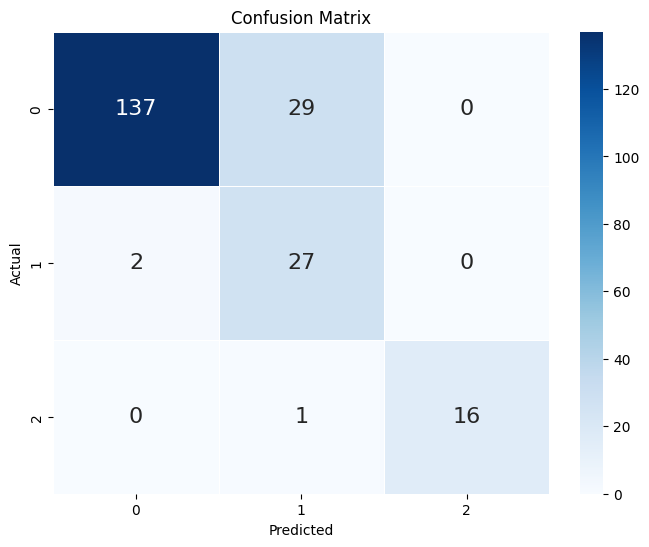

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.8976005338669427


In [ ]:
# Binarize the output
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3
# Use cross_val_predict to obtain predictions with class probabilities
y_score= cross_val_predict(pipeline, X_test,Y_test, cv=skf, method='predict_proba')

# Initialize variables to store ROC curve data
fpr = dict()
tpr = dict()
roc_auc = dict()

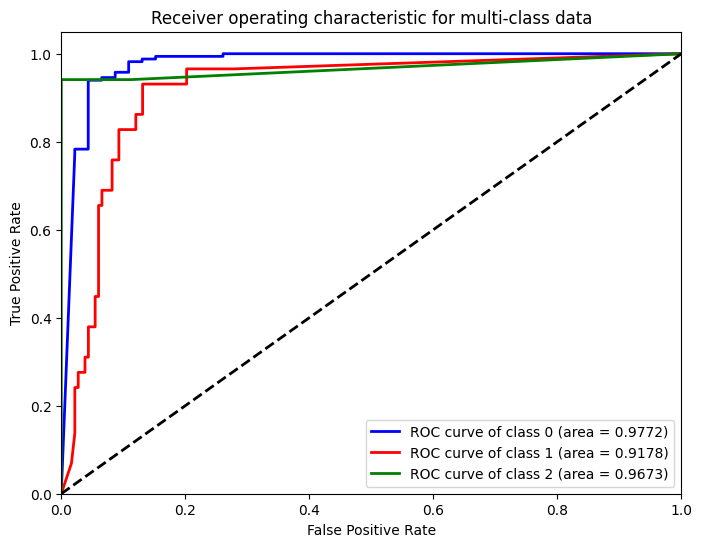

In [ ]:
from itertools import cycle

n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set up colors for the ROC curves
colors = cycle(['blue', 'red', 'green'])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [ ]:
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape Y to a 1D array
    Y_train = Y_train.values.ravel()
    Y_test = Y_test.values.ravel()

In [ ]:
param_grid = {
    'class_weight': [None, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear' ],
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1.0, 10.0,12.0,15.0]
}


lr = LogisticRegression(random_state=42, max_iter=100000000000)



grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1, cv=skf)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

lr = LogisticRegression(
    class_weight=best_params['class_weight'],
    solver=best_params['solver'],
    penalty=best_params['penalty'],
    C=best_params['C'],
    random_state=42,
    max_iter=100000000
)

In [ ]:
result= pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000768,0.000163,0.000000,0.000000,0.1,None,l1,newton-cg,"{'C': 0.1, 'class_weight': None, 'penalty': 'l...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1,0.000590,0.000165,0.000000,0.000000,0.1,None,l1,lbfgs,"{'C': 0.1, 'class_weight': None, 'penalty': 'l...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2,0.003924,0.001992,0.000000,0.000000,0.1,None,l1,liblinear,"{'C': 0.1, 'class_weight': None, 'penalty': 'l...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
3,1.955169,0.332251,0.003556,0.000238,0.1,None,l2,newton-cg,"{'C': 0.1, 'class_weight': None, 'penalty': 'l...",0.989583,...,0.951734,0.978725,0.973718,0.994729,1.000000,0.978930,0.967748,0.977199,0.013918,21
4,9.579071,1.106771,0.004092,0.000710,0.1,None,l2,lbfgs,"{'C': 0.1, 'class_weight': None, 'penalty': 'l...",0.989583,...,0.956774,0.978725,0.973718,0.994729,1.000000,0.978930,0.967748,0.977174,0.013704,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.000629,0.000038,0.000000,0.000000,15.0,balanced,l1,lbfgs,"{'C': 15.0, 'class_weight': 'balanced', 'penal...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
68,0.003242,0.000120,0.000000,0.000000,15.0,balanced,l1,liblinear,"{'C': 15.0, 'class_weight': 'balanced', 'penal...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
69,3.736748,0.583955,0.005729,0.003456,15.0,balanced,l2,newton-cg,"{'C': 15.0, 'class_weight': 'balanced', 'penal...",0.994830,...,0.968253,0.979361,0.979636,0.994805,0.979445,0.989529,0.994805,0.983950,0.008801,11
70,7.382953,1.849339,0.003958,0.001692,15.0,balanced,l2,lbfgs,"{'C': 15.0, 'class_weight': 'balanced', 'penal...",0.994830,...,0.968253,0.979361,0.979636,0.994805,0.979445,0.989529,0.994805,0.983950,0.008801,11


In [ ]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
39,3.785602,0.670974,0.004157,0.001807,10.0,None,l2,newton-cg,"{'C': 10.0, 'class_weight': None, 'penalty': '...",0.99483,...,0.978471,0.989529,0.984626,0.994805,0.989599,0.994722,1.0,0.990016,0.006059,1
40,9.663344,0.597195,0.004891,0.001864,10.0,None,l2,lbfgs,"{'C': 10.0, 'class_weight': None, 'penalty': '...",0.99483,...,0.978471,0.984410,0.984626,0.994805,0.989599,0.994722,1.0,0.989504,0.006291,2
52,9.720884,0.608795,0.003900,0.000566,12.0,None,l2,lbfgs,"{'C': 12.0, 'class_weight': None, 'penalty': '...",0.99483,...,0.978471,0.984410,0.984626,0.994805,0.989599,0.994722,1.0,0.989504,0.006291,2
64,9.762358,0.470172,0.004608,0.002826,15.0,None,l2,lbfgs,"{'C': 15.0, 'class_weight': None, 'penalty': '...",0.99483,...,0.978471,0.984410,0.984626,0.994805,0.989599,0.994722,1.0,0.989504,0.006291,2
51,3.992964,0.627742,0.003490,0.000241,12.0,None,l2,newton-cg,"{'C': 12.0, 'class_weight': None, 'penalty': '...",0.99483,...,0.973322,0.989529,0.984626,0.994805,0.989599,0.994722,1.0,0.989501,0.007141,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.000619,0.000043,0.000000,0.000000,10.0,None,l1,newton-cg,"{'C': 10.0, 'class_weight': None, 'penalty': '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
37,0.000703,0.000125,0.000000,0.000000,10.0,None,l1,lbfgs,"{'C': 10.0, 'class_weight': None, 'penalty': '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
38,0.003400,0.000642,0.000000,0.000000,10.0,None,l1,liblinear,"{'C': 10.0, 'class_weight': None, 'penalty': '...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
42,0.000635,0.000069,0.000000,0.000000,10.0,balanced,l1,newton-cg,"{'C': 10.0, 'class_weight': 'balanced', 'penal...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25


In [ ]:
rfecv = RFECV(estimator=lr, step=1, cv=skf, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', rfecv),
    ('classifier',lr)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,13.568434,0.005537,1.000000,1.000000,1.000000,1.000000,1.000000
1,13.534843,0.005280,0.989583,0.989583,0.989583,0.989583,0.971926
2,13.258451,0.005482,0.984375,0.984683,0.984375,0.983993,0.956731
3,13.079676,0.005905,0.989583,0.989721,0.989583,0.989418,0.971416
4,13.138592,0.005402,0.989529,0.989529,0.989529,0.989529,0.971334
5,13.166866,0.006078,0.979058,0.980069,0.979058,0.979360,0.944774
6,13.230394,0.007968,0.994764,0.994958,0.994764,0.994805,0.985821
7,11.981019,0.005281,0.989529,0.989837,0.989529,0.989599,0.971664
8,12.813138,0.005812,0.994764,0.994799,0.994764,0.994722,0.985558
9,13.030586,0.005242,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Output.mean(axis=0)

fit_time                   13.080200
score_time                  0.005799
test_accuracy               0.991119
test_precision_weighted     0.991318
test_recall_weighted        0.991119
test_f1_weighted            0.991101
test_kappa                  0.975922
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9671895


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       166
         1.0       0.87      0.90      0.88        29
         2.0       1.00      0.94      0.97        17

    accuracy                           0.97       212
   macro avg       0.95      0.94      0.94       212
weighted avg       0.97      0.97      0.97       212



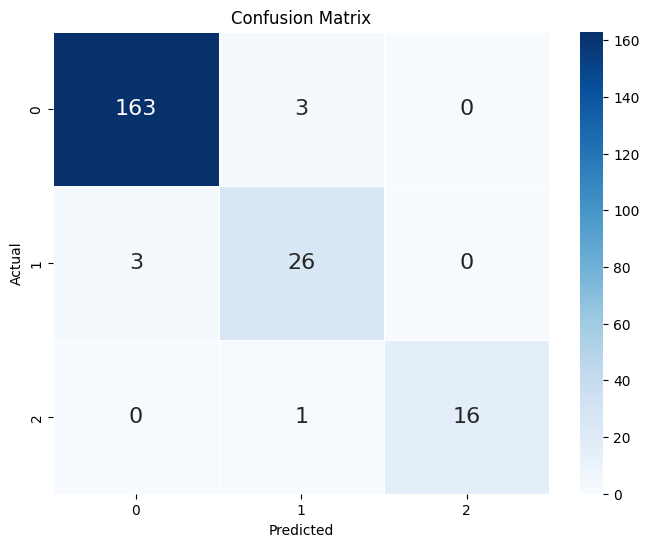

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.9392372520385451


In [ ]:
# Binarize the output
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3
# Use cross_val_predict to obtain predictions with class probabilities
y_score= cross_val_predict(pipeline, X_test,Y_test, cv=skf, method='predict_proba')

# Initialize variables to store ROC curve data
fpr = dict()
tpr = dict()
roc_auc = dict()

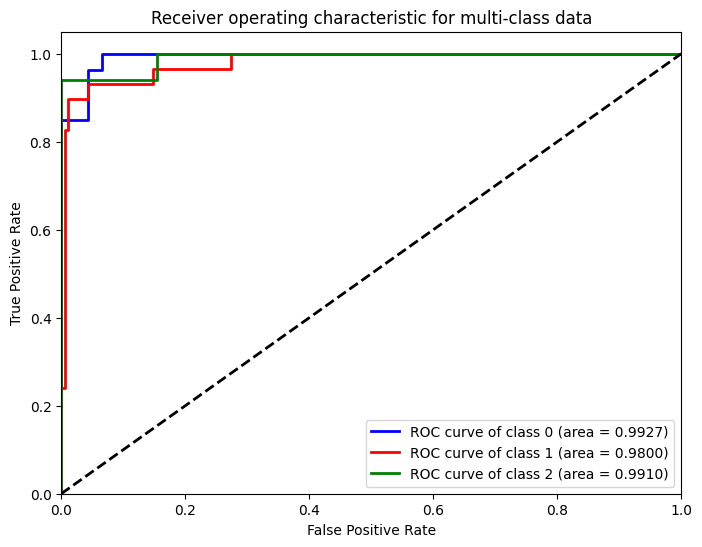

In [ ]:
n_classes=3
from itertools import cycle
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])


plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i , roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


In [ ]:
rfecv.fit(X_train, Y_train)
best_features = X_train.columns[rfecv.support_]
# print the column names of the selected features
print(best_features)

Index(['b', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'DL', 'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'AD',
       'DE', 'LD', 'FS', 'SUSP'],
      dtype='object')


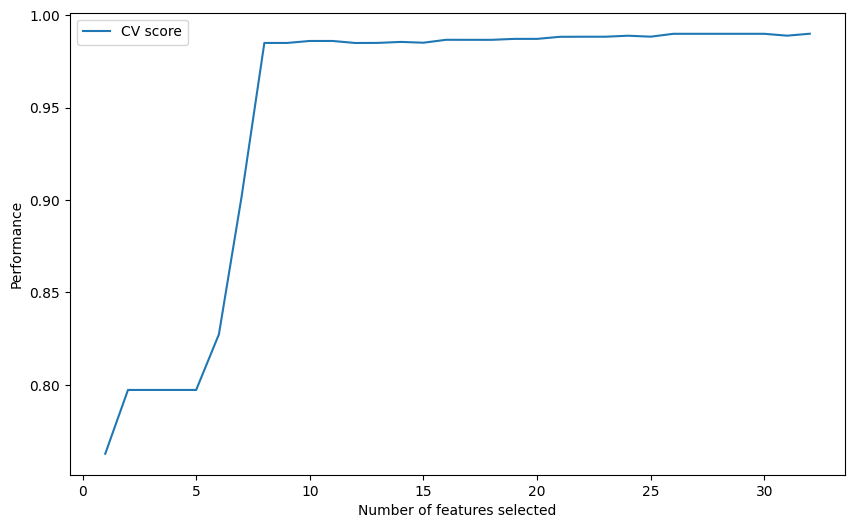

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# KNN Classifier

In [ ]:
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape Y to a 1D array
    Y_train = Y_train.values.ravel()
    Y_test = Y_test.values.ravel()

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=skf, scoring=make_scorer(f1_score, average='weighted'),n_jobs=-1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

In [ ]:
result= pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002833,0.000562,0.029460,0.019219,2,{'n_neighbors': 2},0.805871,0.844828,0.796433,0.819941,0.849102,0.818796,0.819791,0.825663,0.801726,0.795115,0.817727,0.017758,6
1,0.003366,0.000676,0.021435,0.003576,3,{'n_neighbors': 3},0.830780,0.840277,0.845060,0.816242,0.850999,0.817758,0.834984,0.836305,0.822430,0.840673,0.833551,0.011058,1
2,0.002826,0.000280,0.020373,0.000315,4,{'n_neighbors': 4},0.833541,0.859728,0.832362,0.820680,0.845021,0.799832,0.831370,0.818002,0.809181,0.827706,0.827742,0.016303,3
3,0.003115,0.000504,0.022744,0.003677,5,{'n_neighbors': 5},0.828971,0.856919,0.833968,0.842707,0.862614,0.811894,0.830862,0.815052,0.821539,0.828420,0.833295,0.015761,2
4,0.003224,0.000666,0.020968,0.000526,6,{'n_neighbors': 6},0.848560,0.828871,0.827175,0.822043,0.833614,0.800683,0.840593,0.783078,0.806623,0.830191,0.822143,0.018795,4
5,0.003003,0.000213,0.023131,0.006253,7,{'n_neighbors': 7},0.838974,0.823743,0.809576,0.824934,0.845091,0.793251,0.824086,0.771520,0.813898,0.829338,0.817441,0.020684,7
6,0.005002,0.003143,0.034044,0.011544,8,{'n_neighbors': 8},0.823038,0.846734,0.798045,0.801088,0.835608,0.800683,0.817515,0.787000,0.818139,0.805518,0.813337,0.017449,10
7,0.004130,0.002024,0.044062,0.015274,9,{'n_neighbors': 9},0.822081,0.851310,0.807314,0.807550,0.846439,0.800683,0.812609,0.804858,0.832813,0.806540,0.819220,0.017309,5
8,0.007007,0.004270,0.041010,0.012947,10,{'n_neighbors': 10},0.826687,0.842307,0.805492,0.811715,0.832502,0.800683,0.820995,0.800228,0.810775,0.801109,0.815249,0.013997,9
9,0.003491,0.002072,0.027244,0.011530,11,{'n_neighbors': 11},0.825690,0.837729,0.798600,0.811715,0.833010,0.800683,0.821457,0.803693,0.818139,0.803127,0.815384,0.013262,8


In [ ]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.003366,0.000676,0.021435,0.003576,3,{'n_neighbors': 3},0.830780,0.840277,0.845060,0.816242,0.850999,0.817758,0.834984,0.836305,0.822430,0.840673,0.833551,0.011058,1
3,0.003115,0.000504,0.022744,0.003677,5,{'n_neighbors': 5},0.828971,0.856919,0.833968,0.842707,0.862614,0.811894,0.830862,0.815052,0.821539,0.828420,0.833295,0.015761,2
2,0.002826,0.000280,0.020373,0.000315,4,{'n_neighbors': 4},0.833541,0.859728,0.832362,0.820680,0.845021,0.799832,0.831370,0.818002,0.809181,0.827706,0.827742,0.016303,3
4,0.003224,0.000666,0.020968,0.000526,6,{'n_neighbors': 6},0.848560,0.828871,0.827175,0.822043,0.833614,0.800683,0.840593,0.783078,0.806623,0.830191,0.822143,0.018795,4
7,0.004130,0.002024,0.044062,0.015274,9,{'n_neighbors': 9},0.822081,0.851310,0.807314,0.807550,0.846439,0.800683,0.812609,0.804858,0.832813,0.806540,0.819220,0.017309,5
0,0.002833,0.000562,0.029460,0.019219,2,{'n_neighbors': 2},0.805871,0.844828,0.796433,0.819941,0.849102,0.818796,0.819791,0.825663,0.801726,0.795115,0.817727,0.017758,6
5,0.003003,0.000213,0.023131,0.006253,7,{'n_neighbors': 7},0.838974,0.823743,0.809576,0.824934,0.845091,0.793251,0.824086,0.771520,0.813898,0.829338,0.817441,0.020684,7
9,0.003491,0.002072,0.027244,0.011530,11,{'n_neighbors': 11},0.825690,0.837729,0.798600,0.811715,0.833010,0.800683,0.821457,0.803693,0.818139,0.803127,0.815384,0.013262,8
8,0.007007,0.004270,0.041010,0.012947,10,{'n_neighbors': 10},0.826687,0.842307,0.805492,0.811715,0.832502,0.800683,0.820995,0.800228,0.810775,0.801109,0.815249,0.013997,9
6,0.005002,0.003143,0.034044,0.011544,8,{'n_neighbors': 8},0.823038,0.846734,0.798045,0.801088,0.835608,0.800683,0.817515,0.787000,0.818139,0.805518,0.813337,0.017449,10


In [ ]:
best_hyperparameters = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'n_neighbors': 3}


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=best_hyperparameters['n_neighbors'])

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',KNN)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,0.003509,0.113350,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.004164,0.040557,0.989583,0.989583,0.989583,0.989583,0.971926
2,0.003232,0.017511,0.979167,0.979711,0.979167,0.978471,0.941774
3,0.003198,0.015043,0.968750,0.968525,0.968750,0.967707,0.912661
4,0.003121,0.017373,0.979058,0.978847,0.979058,0.978725,0.941599
5,0.003104,0.015583,0.994764,0.994800,0.994764,0.994724,0.985821
6,0.003250,0.015129,0.994764,0.994958,0.994764,0.994805,0.985821
7,0.003010,0.014643,0.989529,0.990692,0.989529,0.989777,0.971685
8,0.003012,0.014692,0.989529,0.989667,0.989529,0.989354,0.970844
9,0.002849,0.016320,0.989529,0.989667,0.989529,0.989428,0.970822


In [ ]:
Output.mean(axis=0)

fit_time                   0.003245
score_time                 0.028020
test_accuracy              0.987467
test_precision_weighted    0.987645
test_recall_weighted       0.987467
test_f1_weighted           0.987257
test_kappa                 0.965295
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9464900


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       166
         1.0       0.88      0.76      0.81        29
         2.0       1.00      0.88      0.94        17

    accuracy                           0.95       212
   macro avg       0.94      0.88      0.91       212
weighted avg       0.95      0.95      0.95       212



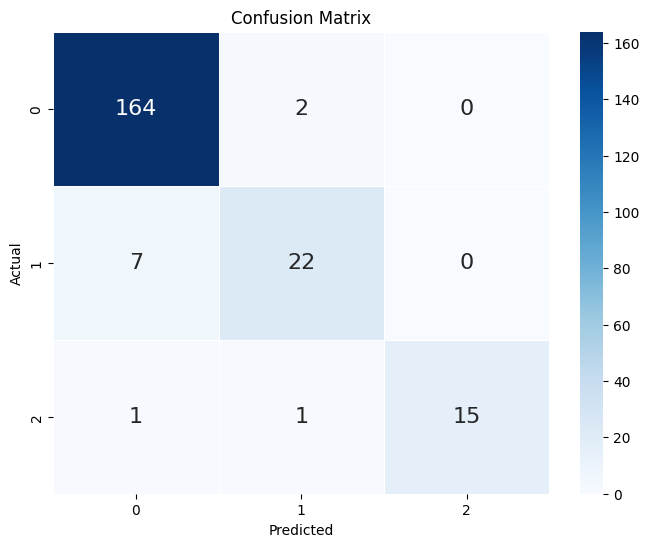

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.8712328860904058


In [ ]:
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3

y_score= cross_val_predict(pipeline, X_test,Y_test, cv=skf, method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()

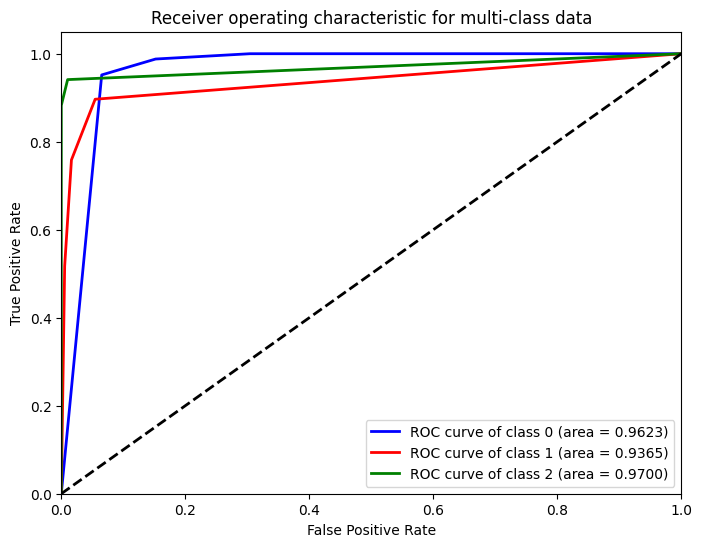

In [ ]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])


plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# SVM

In [ ]:
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape Y to a 1D array
    Y_train = Y_train.values.ravel()
    Y_test = Y_test.values.ravel()

In [ ]:
svc=SVC(random_state=42)

In [ ]:
para = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'C': [1.5, 1, 3, 4],
    'class_weight': [None, 'balanced']
}

In [ ]:
grid= GridSearchCV(estimator= svc, param_grid= para, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1, cv=skf)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1.5, 1, 3, 4],
                         'class_weight': [None, 'balanced'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
result= pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.162878,0.045753,0.028113,0.005470,1.5,None,rbf,"{'C': 1.5, 'class_weight': None, 'kernel': 'rbf'}",0.678183,0.678183,...,0.678183,0.683739,0.676582,0.683739,0.683739,0.683739,0.683739,0.680801,0.002973,20
1,211.946213,99.529783,0.008488,0.005293,1.5,None,linear,"{'C': 1.5, 'class_weight': None, 'kernel': 'li...",0.994830,0.984491,...,0.972845,0.989529,0.989680,0.994805,1.000000,0.994722,0.989354,0.989425,0.007259,2
2,0.287748,0.059438,0.016668,0.005743,1.5,None,poly,"{'C': 1.5, 'class_weight': None, 'kernel': 'po...",0.700703,0.710518,...,0.719566,0.724946,0.688439,0.725386,0.744381,0.683739,0.706400,0.711460,0.017224,16
3,0.192946,0.036474,0.023425,0.005905,1.5,None,sigmoid,"{'C': 1.5, 'class_weight': None, 'kernel': 'si...",0.681196,0.687501,...,0.677966,0.643591,0.696626,0.666535,0.683254,0.713688,0.677170,0.681321,0.017359,19
4,0.457082,0.112248,0.057510,0.013056,1.5,balanced,rbf,"{'C': 1.5, 'class_weight': 'balanced', 'kernel...",0.807064,0.792356,...,0.744014,0.792774,0.809983,0.841137,0.826229,0.762639,0.771286,0.792944,0.027969,11
5,256.675195,104.990138,0.009981,0.004766,1.5,balanced,linear,"{'C': 1.5, 'class_weight': 'balanced', 'kernel...",0.979743,0.950558,...,0.968750,0.984410,0.984626,0.994805,0.984642,0.994722,0.994805,0.982131,0.012975,5
6,0.544251,0.190705,0.035665,0.013117,1.5,balanced,poly,"{'C': 1.5, 'class_weight': 'balanced', 'kernel...",0.509237,0.453647,...,0.439257,0.522089,0.484200,0.440468,0.503310,0.403206,0.450668,0.460872,0.040235,27
7,0.471160,0.141579,0.049081,0.016853,1.5,balanced,sigmoid,"{'C': 1.5, 'class_weight': 'balanced', 'kernel...",0.502094,0.091201,...,0.106740,0.084767,0.512706,0.080514,0.083149,0.089528,0.067432,0.168226,0.169981,29
8,0.143245,0.009864,0.026562,0.000801,1,None,rbf,"{'C': 1, 'class_weight': None, 'kernel': 'rbf'}",0.678183,0.678183,...,0.678183,0.683739,0.676582,0.683739,0.683739,0.683739,0.683739,0.680801,0.002973,20
9,190.086735,58.068693,0.006895,0.000190,1,None,linear,"{'C': 1, 'class_weight': None, 'kernel': 'line...",0.994830,0.989583,...,0.972845,0.984171,0.994724,0.994805,1.000000,0.994722,0.989354,0.989903,0.007456,1


In [ ]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
9,190.086735,58.068693,0.006895,0.000190,1,None,linear,"{'C': 1, 'class_weight': None, 'kernel': 'line...",0.994830,0.989583,...,0.972845,0.984171,0.994724,0.994805,1.000000,0.994722,0.989354,0.989903,0.007456,1
1,211.946213,99.529783,0.008488,0.005293,1.5,None,linear,"{'C': 1.5, 'class_weight': None, 'kernel': 'li...",0.994830,0.984491,...,0.972845,0.989529,0.989680,0.994805,1.000000,0.994722,0.989354,0.989425,0.007259,2
17,276.176788,108.651906,0.006649,0.000961,3,None,linear,"{'C': 3, 'class_weight': None, 'kernel': 'line...",0.994830,0.979468,...,0.978471,0.989529,0.974377,0.994805,0.989687,0.994722,0.994722,0.986945,0.007814,3
25,257.142210,105.154081,0.007294,0.002881,4,None,linear,"{'C': 4, 'class_weight': None, 'kernel': 'line...",0.989734,0.979468,...,0.978471,0.989529,0.969040,0.994805,0.989687,0.994722,0.989354,0.985365,0.007994,4
5,256.675195,104.990138,0.009981,0.004766,1.5,balanced,linear,"{'C': 1.5, 'class_weight': 'balanced', 'kernel...",0.979743,0.950558,...,0.968750,0.984410,0.984626,0.994805,0.984642,0.994722,0.994805,0.982131,0.012975,5
21,281.578331,106.618756,0.008338,0.004389,3,balanced,linear,"{'C': 3, 'class_weight': 'balanced', 'kernel':...",0.979743,0.974511,...,0.968253,0.979361,0.979636,0.994805,0.969888,0.989529,0.994805,0.980937,0.008903,6
13,202.561714,66.218329,0.010227,0.006625,1,balanced,linear,"{'C': 1, 'class_weight': 'balanced', 'kernel':...",0.984707,0.959989,...,0.968253,0.979361,0.984626,0.994805,0.974747,0.989529,0.989529,0.979930,0.010246,7
29,249.236584,77.990395,0.011149,0.004354,4,balanced,linear,"{'C': 4, 'class_weight': 'balanced', 'kernel':...",0.979743,0.955251,...,0.968253,0.984410,0.979636,0.989687,0.979663,0.984415,0.994805,0.979470,0.010494,8
28,0.333869,0.064468,0.050770,0.011340,4,balanced,rbf,"{'C': 4, 'class_weight': 'balanced', 'kernel':...",0.850494,0.791926,...,0.798685,0.843625,0.837127,0.869467,0.842537,0.800317,0.796299,0.825312,0.025793,9
20,0.356019,0.060808,0.052450,0.008445,3,balanced,rbf,"{'C': 3, 'class_weight': 'balanced', 'kernel':...",0.837445,0.803964,...,0.794195,0.825434,0.821301,0.869467,0.836490,0.799407,0.776366,0.817091,0.025286,10


In [ ]:
best_hyperparameters = grid.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'C': 1, 'class_weight': None, 'kernel': 'linear'}


In [ ]:
best_svm= SVC(kernel=best_hyperparameters['kernel'],
                     C=best_hyperparameters['C'],
                     class_weight=best_hyperparameters['class_weight'],random_state=42)

In [ ]:
rfecv = RFECV(estimator=best_svm, step=1, cv=skf, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection',rfecv),
    ('classifier',best_svm)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,7.614638,0.009700,0.994792,0.994978,0.994792,0.994830,0.986087
1,9.837590,0.012089,0.984375,0.984747,0.984375,0.984433,0.957855
2,7.322288,0.008018,0.984375,0.984683,0.984375,0.983993,0.956731
3,9.793831,0.008389,0.989583,0.989721,0.989583,0.989418,0.971416
4,7.537963,0.008089,0.989529,0.989529,0.989529,0.989529,0.971334
5,10.063193,0.007864,0.994764,0.994800,0.994764,0.994724,0.985821
6,7.371890,0.021883,0.989529,0.989529,0.989529,0.989529,0.971381
7,9.473144,0.008334,0.989529,0.989837,0.989529,0.989599,0.971664
8,7.753188,0.011990,0.994764,0.994799,0.994764,0.994722,0.985558
9,9.783589,0.008658,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Output.mean(axis=0)

fit_time                   8.655131
score_time                 0.010501
test_accuracy              0.991124
test_precision_weighted    0.991262
test_recall_weighted       0.991124
test_f1_weighted           0.991078
test_kappa                 0.975785
dtype: float64

In [ ]:
Output.mean(axis=0)

fit_time                   8.655131
score_time                 0.010501
test_accuracy              0.991124
test_precision_weighted    0.991262
test_recall_weighted       0.991124
test_f1_weighted           0.991078
test_kappa                 0.975785
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9612963


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       166
         1.0       0.89      0.83      0.86        29
         2.0       0.88      0.82      0.85        17

    accuracy                           0.96       212
   macro avg       0.92      0.88      0.90       212
weighted avg       0.96      0.96      0.96       212



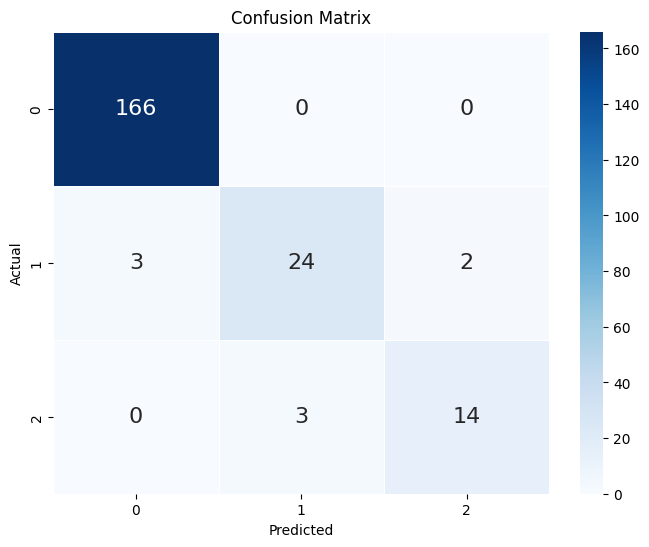

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.8800299499750309


In [ ]:
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3
y_score= cross_val_predict(pipeline, X_test,Y_test, cv=skf,  method='decision_function')
fpr = dict()
tpr = dict()
roc_auc = dict()

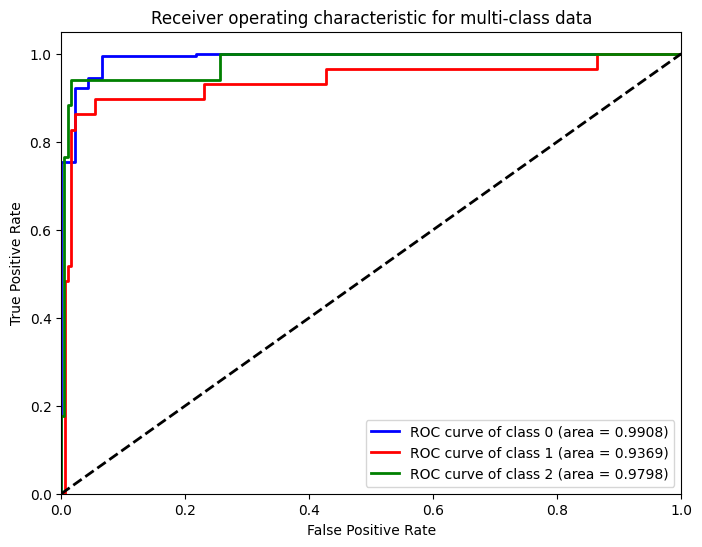

In [ ]:
from itertools import cycle
n_classes =3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i , roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rfecv = RFECV(estimator=best_svm, step=1, cv=skf, scoring= make_scorer(f1_score, average='weighted'), n_jobs=-1)
rfecv.fit(X_test,Y_test)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
      estimator=SVC(C=1, kernel='linear', random_state=42), n_jobs=-1,
      scoring=make_scorer(f1_score, average=weighted))

In [ ]:
best_features = X_test.columns[rfecv.support_]
print(best_features)

Index(['LBE', 'LB', 'AC', 'UC', 'MSTV', 'DL', 'DP', 'Nmax', 'Nzeros', 'Mean',
       'Tendency', 'A', 'B', 'C', 'AD', 'DE', 'FS', 'SUSP'],
      dtype='object')


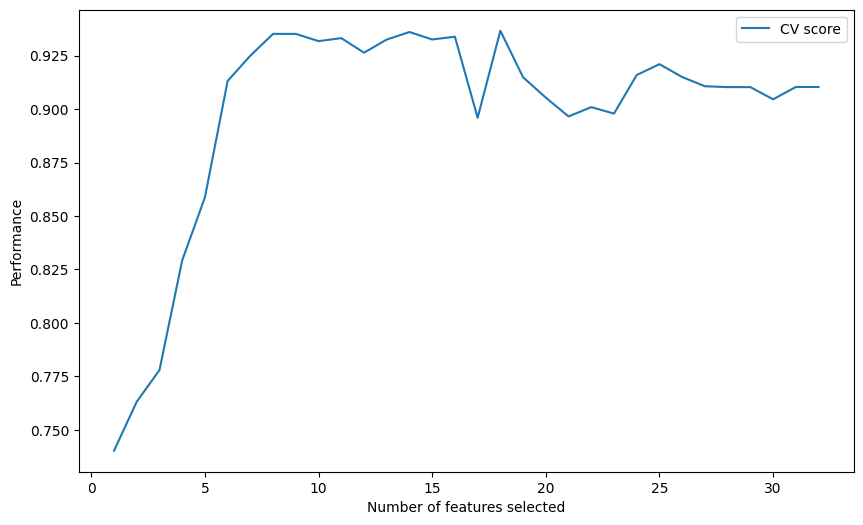

In [ ]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y.values.ravel())
for train_index, test_index in skf.split(X, Y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y_encoded[train_index], Y_encoded[test_index]

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, objective='multi:softmax', num_class=3)

xgb_params = {
    'n_estimators': [200, 150, 250,300,225],
    'learning_rate': [0.2, 0.1, 0.3,.25,.27],
    'max_depth': [3,6,9,7,8],
    'scale_pos_weight': [None, 'balanced']
}

In [ ]:
grid= GridSearchCV(estimator = xgb, param_grid= xgb_params, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1, cv=skf)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_t...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.1, 0.3, 0.25, 0.27],
                         'max_depth': [3, 6, 9, 7, 8],
                         'n_estimators': [200, 150, 250, 300, 225],
                         'scale_pos_weight': [None, 'balanced']},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
result= pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_scale_pos_weight,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.751871,0.245255,0.018933,0.007395,0.2,3,200,None,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.989529,0.979110,0.983891,0.983891,0.983549,0.006148,229
1,0.457234,0.013528,0.012925,0.001980,0.2,3,200,balanced,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.989529,0.979110,0.983891,0.983891,0.983549,0.006148,229
2,0.358005,0.012361,0.011652,0.000739,0.2,3,150,None,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.989529,0.979110,0.983891,0.983891,0.983549,0.006148,229
3,0.409917,0.063726,0.014554,0.005566,0.2,3,150,balanced,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.989529,0.979110,0.983891,0.983891,0.983549,0.006148,229
4,0.634238,0.106441,0.013493,0.002664,0.2,3,250,None,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.989529,0.979110,0.983891,0.983891,0.983549,0.006148,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.822781,0.323005,0.014754,0.007015,0.27,8,250,balanced,"{'learning_rate': 0.27, 'max_depth': 8, 'n_est...",0.994751,...,0.967707,0.984171,0.983910,0.994805,0.984219,0.989354,0.989354,0.985652,0.007266,57
246,0.714223,0.086718,0.012942,0.000522,0.27,8,300,None,"{'learning_rate': 0.27, 'max_depth': 8, 'n_est...",0.994751,...,0.967707,0.984171,0.983910,0.994805,0.984219,0.989354,0.989354,0.985652,0.007266,57
247,0.712046,0.085039,0.013690,0.001965,0.27,8,300,balanced,"{'learning_rate': 0.27, 'max_depth': 8, 'n_est...",0.994751,...,0.967707,0.984171,0.983910,0.994805,0.984219,0.989354,0.989354,0.985652,0.007266,57
248,1.091234,0.220016,0.021446,0.008909,0.27,8,225,None,"{'learning_rate': 0.27, 'max_depth': 8, 'n_est...",0.994751,...,0.967707,0.984171,0.983910,0.994805,0.984219,0.989354,0.989354,0.985652,0.007266,57


In [ ]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_scale_pos_weight,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
138,0.783344,0.200368,0.017991,0.008166,0.3,7,225,None,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",0.994751,...,0.973322,0.984171,0.989363,0.994805,0.979110,0.989354,0.989354,0.986248,0.006371,1
134,0.914137,0.322970,0.023728,0.011640,0.3,7,250,None,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",0.994751,...,0.973322,0.984171,0.989363,0.994805,0.979110,0.989354,0.989354,0.986248,0.006371,1
135,0.630989,0.121646,0.014623,0.004837,0.3,7,250,balanced,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",0.994751,...,0.973322,0.984171,0.989363,0.994805,0.979110,0.989354,0.989354,0.986248,0.006371,1
139,0.573084,0.097477,0.012549,0.000527,0.3,7,225,balanced,"{'learning_rate': 0.3, 'max_depth': 7, 'n_esti...",0.994751,...,0.973322,0.984171,0.989363,0.994805,0.979110,0.989354,0.989354,0.986248,0.006371,1
35,0.702390,0.144433,0.012838,0.000282,0.2,7,250,balanced,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.994751,...,0.973322,0.984171,0.983910,0.994805,0.984219,0.989354,0.989354,0.986213,0.005957,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.764997,0.106482,0.015523,0.005886,0.1,3,300,balanced,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.994805,0.979110,0.983891,0.978324,0.983520,0.007043,243
62,1.023024,0.233504,0.022950,0.010647,0.1,6,150,None,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.994805,0.974078,0.983891,0.978324,0.983017,0.007505,247
63,0.591871,0.088877,0.014885,0.004188,0.1,6,150,balanced,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.994805,0.974078,0.983891,0.978324,0.983017,0.007505,247
54,1.010635,0.317918,0.022129,0.007643,0.1,3,250,None,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.989583,...,0.967707,0.984171,0.989363,0.989529,0.979110,0.983891,0.978324,0.982992,0.006341,249


In [ ]:
best_hyperparameters = grid.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 250, 'scale_pos_weight': None}


In [ ]:
best_xgb = XGBClassifier(
    random_state=42,
    objective='multi:softmax',
    num_class=3,
    n_estimators=best_hyperparameters['n_estimators'],
    learning_rate=best_hyperparameters['learning_rate'],
    max_depth=best_hyperparameters['max_depth'],
    scale_pos_weight=best_hyperparameters['scale_pos_weight']
)

In [ ]:
rfecv = RFECV(estimator=best_xgb, step=1, cv=skf, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection',rfecv),
    ('classifier',best_xgb)
])

In [ ]:
scores = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'kappa': make_scorer(cohen_kappa_score) }

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,82.045299,0.011250,0.989583,0.989583,0.989583,0.989583,0.971926
1,79.469189,0.013440,0.984375,0.984244,0.984375,0.984254,0.957510
2,79.627063,0.011184,0.979167,0.979711,0.979167,0.978471,0.941774
3,79.010913,0.011580,0.973958,0.973718,0.973958,0.973322,0.927885
4,81.159064,0.011024,0.984293,0.984162,0.984293,0.984171,0.956604
5,83.838335,0.059871,0.994764,0.994800,0.994764,0.994724,0.985821
6,82.493670,0.012393,0.994764,0.994958,0.994764,0.994805,0.985821
7,79.621099,0.011225,0.973822,0.974640,0.973822,0.974078,0.929800
8,83.031621,0.011050,0.984293,0.984603,0.984293,0.983891,0.955852
9,80.367137,0.021075,0.989529,0.989667,0.989529,0.989354,0.970844


In [ ]:
Output.mean(axis=0)

fit_time                   81.066339
score_time                  0.017409
test_accuracy               0.984855
test_precision_weighted     0.985009
test_recall_weighted        0.984855
test_f1_weighted            0.984665
test_kappa                  0.958384
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9407974


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       166
           1       0.88      0.72      0.79        29
           2       0.93      0.82      0.87        17

    accuracy                           0.94       212
   macro avg       0.92      0.85      0.88       212
weighted avg       0.94      0.94      0.94       212



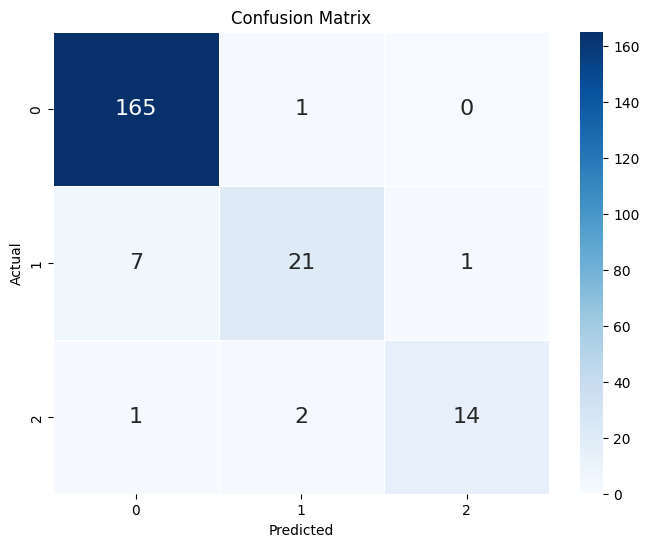

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.8400247636418369


In [ ]:
y_train_binarized = label_binarize(Y_train, classes=[0, 1, 2])
y_test_binarized = label_binarize(Y_test, classes=[0, 1, 2])
number_of_classes = 3
y_score = cross_val_predict(pipeline, X_test, Y_test, cv=skf, method='predict_proba')

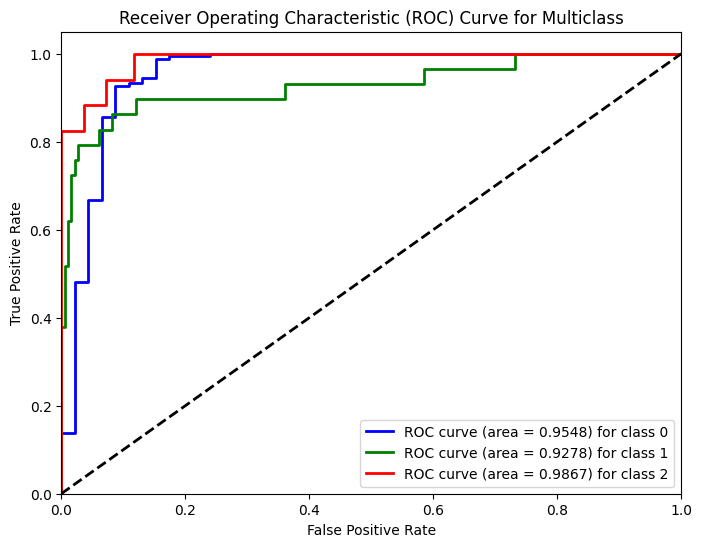

In [ ]:
roc_curves = {}
roc_auc = {}

for class_index in range(number_of_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, class_index], y_score[:, class_index])
    roc_curves[class_index] = (fpr, tpr)
    roc_auc[class_index] = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']
for class_index in range(number_of_classes):
    fpr, tpr = roc_curves[class_index]
    plt.plot(fpr, tpr, color=colors[class_index], lw=2, label='ROC curve (area = %0.4f) for class %s' % (roc_auc[class_index], class_index))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

In [ ]:
rfecv = RFECV(estimator=best_xgb, step=1, cv=skf, scoring= make_scorer(f1_score, average='micro'), n_jobs=-1)
rfecv.fit(X_test,Y_test)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=250, n_jobs=None, num_class=3,
                              num_parallel_tree=None, ...),
      n_jobs=-1, scoring=make_scorer(f1_score, average=micro))

In [ ]:
best_features = X_test.columns[rfecv.support_]
# print the column names of the selected features
print(best_features)

Index(['b', 'LBE', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DP',
       'Width', 'Max', 'Mode', 'Mean', 'Variance', 'A', 'DE', 'LD', 'FS',
       'SUSP'],
      dtype='object')


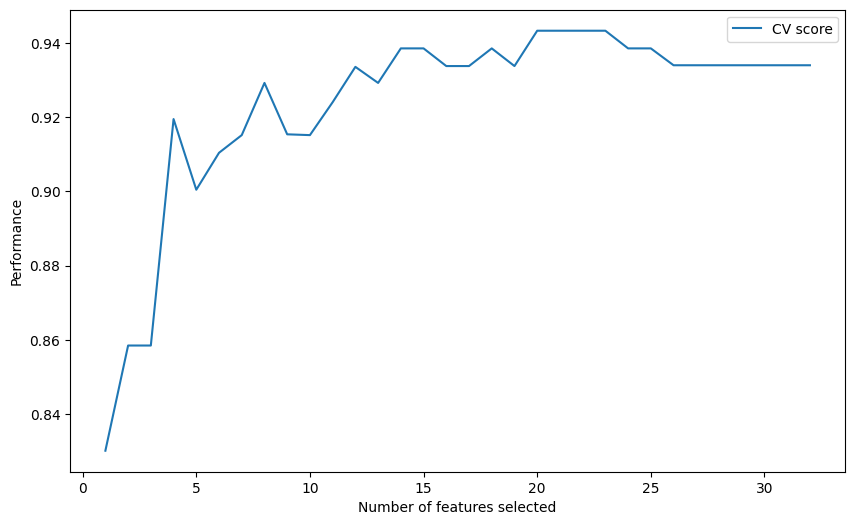

In [ ]:
# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Ensemble ( majority voting )

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y.values.ravel())
for train_index, test_index in skf.split(X, Y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y_encoded[train_index], Y_encoded[test_index]

In [ ]:
best_svm = SVC(kernel='linear', C=1, class_weight=None, random_state=42)
rfc = RandomForestClassifier(criterion="gini", n_estimators=150, random_state=42)
xgb = XGBClassifier(random_state=42, objective='multi:softmax', num_class=3, learning_rate=0.3, max_depth=7, n_estimators=250, scale_pos_weight=None)
lr = LogisticRegression(
    class_weight=None,
    solver='newton-cg',
    penalty='l2',
    C=10,
    random_state=42,
    max_iter=100000000
)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rfc),
    ('Logistic Regression', lr),
    ('XGBoost',xgb),
])

In [ ]:
param_grid_voting = {'voting': ['hard', 'soft']}

In [ ]:
grid= GridSearchCV(estimator =voting_classifier, param_grid= param_grid_voting, scoring = make_scorer(f1_score, average='weighted'), n_jobs=-1, cv=skf)

In [ ]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
             estimator=VotingClassifier(estimators=[('Random Forest',
                                                     RandomForestClassifier(n_estimators=150,
                                                                            random_state=42)),
                                                    ('Logistic Regression',
                                                     LogisticRegression(C=10,
                                                                        max_iter=100000000,
                                                                        random_state=42,
                                                                        solver='newton-cg')),
                                                    ('XGBoost',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callba...
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=7,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=250,
                                                                   n_jobs=None,
                                                                   num_class=3,
                                                                   num_parallel_tree=None, ...))]),
             n_jobs=-1, param_grid={'voting': ['hard', 'soft']},
             scoring=make_scorer(f1_score, average=weighted))

In [ ]:
result= pd.DataFrame(grid.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_voting,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,8.403395,2.576839,0.051362,0.024660,hard,{'voting': 'hard'},0.994751,0.984254,0.983993,0.978471,0.984171,0.989363,0.994805,0.984219,0.983891,0.989354,0.986727,0.004961,1
1,7.030881,0.979403,0.041187,0.013619,soft,{'voting': 'soft'},0.994751,0.984254,0.983993,0.978471,0.984171,0.989363,0.994805,0.984219,0.983891,0.989354,0.986727,0.004961,1


In [ ]:
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_voting,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,8.403395,2.576839,0.051362,0.024660,hard,{'voting': 'hard'},0.994751,0.984254,0.983993,0.978471,0.984171,0.989363,0.994805,0.984219,0.983891,0.989354,0.986727,0.004961,1
1,7.030881,0.979403,0.041187,0.013619,soft,{'voting': 'soft'},0.994751,0.984254,0.983993,0.978471,0.984171,0.989363,0.994805,0.984219,0.983891,0.989354,0.986727,0.004961,1


In [ ]:
best_hyperparameters = grid.best_params_
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'voting': 'hard'}


In [ ]:
voting_classifier = VotingClassifier(estimators=[
    ('Random Forest', rfc),
    ('Logistic Regression', lr),
    ('XGBoost', xgb),
    ('SVM', best_svm)
],voting=best_hyperparameters['voting'])


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',voting_classifier)
])

In [ ]:
results = cross_validate(pipeline, X_train,Y_train, cv=skf,scoring=scores)

In [ ]:
Output= pd.DataFrame(results)
Output

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_kappa
0,2.913399,0.213851,0.994792,0.994826,0.994792,0.994751,0.985837
1,0.940699,0.024562,0.984375,0.984244,0.984375,0.984254,0.957510
2,0.922705,0.027078,0.984375,0.984683,0.984375,0.983993,0.956731
3,0.920779,0.023869,0.973958,0.974804,0.973958,0.972845,0.926538
4,1.395082,0.023077,0.984293,0.984162,0.984293,0.984171,0.956604
5,0.902632,0.026310,0.984293,0.984605,0.984293,0.983910,0.956686
6,1.322559,0.024187,0.994764,0.994958,0.994764,0.994805,0.985821
7,0.916515,0.022945,0.989529,0.989872,0.989529,0.989407,0.971137
8,4.921403,0.024438,0.984293,0.984603,0.984293,0.983891,0.955852
9,1.060993,0.165251,0.989529,0.989667,0.989529,0.989354,0.970844


In [ ]:
Output.mean(axis=0)

fit_time                   1.621676
score_time                 0.057557
test_accuracy              0.986420
test_precision_weighted    0.986643
test_recall_weighted       0.986420
test_f1_weighted           0.986138
test_kappa                 0.962356
dtype: float64

In [ ]:
predictions = cross_val_predict(pipeline, X_test,Y_test, cv=skf)

In [ ]:
f1 = f1_score(Y_test, predictions, average='weighted')
print(f'F1-score: {f1:.7f}')

F1-score: 0.9455523


In [ ]:
report_test = classification_report(Y_test, predictions)
print("Classification Report for the Complete Testing Set:")
print(report_test)

Classification Report for the Complete Testing Set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       166
           1       0.88      0.76      0.81        29
           2       1.00      0.76      0.87        17

    accuracy                           0.95       212
   macro avg       0.94      0.84      0.89       212
weighted avg       0.95      0.95      0.95       212



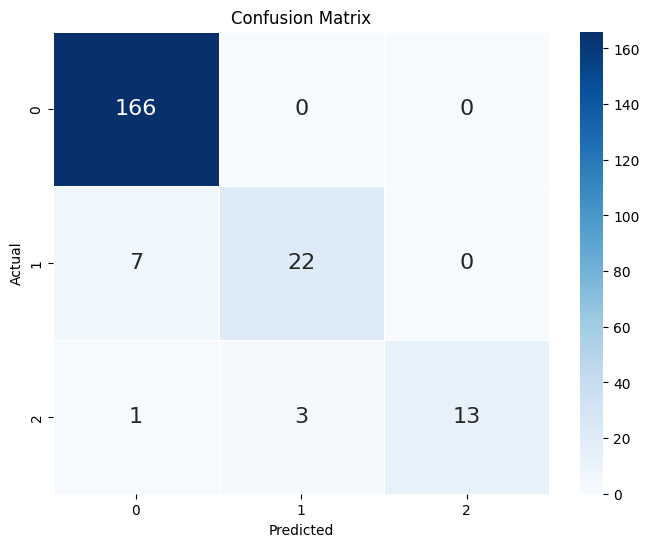

In [ ]:
confusion = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linewidths=0.5, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TP = np.diag(confusion)
FN = np.sum(confusion, axis=1) - TP
TPR = TP / (TP + FN)
g_mean = np.prod(TPR) ** (1 / len(TPR))
print("G-Mean:", g_mean)

G-Mean: 0.8340134182359006


# Results

In results we got that Logistic Regression(96.72%) and SVM(96.12%) gives us  the highest output. We take F1 weighted value as our score measurement because of our imbalance dataset.From the number of features we use , we can say that we can get better result from SVM than Logistic regression since logistic regression uses more features than SVM to get that output.After a breif literature review we came to know that the previous highest result was 95%. So we can say that we can get better output than others.